# *Step 1: Setup*

##### Make sure you have TensorFlow installed:

In [2]:
pip install tensorflow keras matplotlib

Note: you may need to restart the kernel to use updated packages.


# *Step 2: Load Dataset*

##### MNIST comes preloaded in Keras:

In [6]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.datasets import mnist

#Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Train Shape:", x_train.shape)
print("Test Shape:", x_test.shape)

Train Shape: (60000, 28, 28)
Test Shape: (10000, 28, 28)


# *Step 3: Preprocess Data*

* Normalize pixel values (0–255 → 0–1)
* Reshape into 28×28×1 (for CNN input)
* Convert labels to one-hot vectors

In [7]:
#Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

#Reshape (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

#One-hot encode labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Processed Train Shape:", x_train.shape)

Processed Train Shape: (60000, 28, 28, 1)


# *Step 4: Build CNN Model*

##### We’ll use a simple architecture:

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# *Step 5: Train Model*

In [9]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9165 - loss: 0.2673 - val_accuracy: 0.9848 - val_loss: 0.0503
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9733 - loss: 0.0906 - val_accuracy: 0.9868 - val_loss: 0.0418
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9805 - loss: 0.0650 - val_accuracy: 0.9890 - val_loss: 0.0375
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9836 - loss: 0.0550 - val_accuracy: 0.9900 - val_loss: 0.0355
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9861 - loss: 0.0455 - val_accuracy: 0.9905 - val_loss: 0.0330


# *Step 6: Evaluate*

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9918 - loss: 0.0255
Test Accuracy: 0.9918000102043152


# *Step 7: Visualize Training*

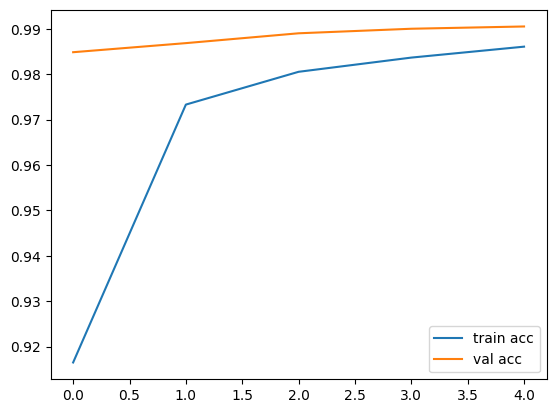

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

##### This should give you ~98-99% accuracy

##### Let's make MNIST more real-world  so that we can see how models behave outside of "clean datasets"

# Making Digit Recognizer more Real-World

# *Step 1: Data Augmentation*

* In reality, handwritten digits won’t always be centered & clean.
* We simulate this using Keras ImageDataGenerator:

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(x_train)

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(x_test, y_test)
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9469 - loss: 0.1766 - val_accuracy: 0.9918 - val_loss: 0.0235
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9660 - loss: 0.1152 - val_accuracy: 0.9891 - val_loss: 0.0310
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9716 - loss: 0.0964 - val_accuracy: 0.9918 - val_loss: 0.0243
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9746 - loss: 0.0866 - val_accuracy: 0.9929 - val_loss: 0.0199
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.9759 - loss: 0.0821 - val_accuracy: 0.9939 - val_loss: 0.0222
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9780 - loss: 0.0765 - val_accuracy: 0.9937 - val_loss: 0.0196
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9798 - loss: 0.0689 - val_accuracy: 0.9939 - val_loss: 0.0195
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9807 - loss: 0.0677 - 

##### This makes the model robust to distortions, not just neat digits.

# *Step 2: Save & Reload Model*

Real-world apps reuse trained models, so let’s save it:

In [13]:
model.save("digit_recognizer.h5")

#Reload later
from tensorflow.keras.models import load_model
new_model = load_model("digit_recognizer.h5")

# *Step 3: Predict on Custom Handwriting*

Now, test with your own handwritten digits!

* Write digits (0–9) on paper.
* Take a photo / scan it.
* Crop digits and convert them to 28×28 grayscale.

In [17]:
import cv2
import numpy as np

#Load saved model
model = load_model("digit_recognizer.h5")

#Load your digit image
img = cv2.imread("handwritten-sample.png", cv2.IMREAD_GRAYSCALE)

#Preprocess
img = cv2.resize(img, (28, 28))
img = img.reshape(1, 28, 28, 1).astype("float32") / 255.0

#Predict
pred = model.predict(img)
print("Predicted Digit:", np.argmax(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted Digit: 8


# *Step 4: Deploy as a Web App (optional)*

##### Turn this into an interactive digit recognizer:
* Use Flask + HTML Canvas → draw a digit in browser → predict instantly.
* Or use Streamlit for a super-fast prototype:

```bash
pip install streamlit

##### app.py file
```bash
import streamlit as st
import numpy as np
import cv2
from tensorflow.keras.models import load_model

model = load_model("digit_recognizer.h5")

st.title("🖊️ Digit Recognizer")
uploaded = st.file_uploader("Upload a digit image", type=["png","jpg","jpeg"])

if uploaded:
    file_bytes = np.asarray(bytearray(uploaded.read()), dtype=np.uint8)
    img = cv2.imdecode(file_bytes, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28)).reshape(1, 28, 28, 1) / 255.0
    pred = model.predict(img)
    st.write("Predicted Digit:", np.argmax(pred))

##### Run with:
```bash
streamlit run app.py